In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [93]:
# Set Seaborn Theme
sns.set_theme(style="darkgrid", palette="Set2")

In [94]:

df = pd.read_csv("/content/realistic_supply_chain_10k.csv")
df.head()


,Month,Season,Product type,Price,Availability,Number of products sold,Customer demographics,Stock levels,Lead times,Order quantities,...,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Location,Seasonal_Factor,Correct_Revenue
0,7,Rainy,skincare,103.65,45,641,Female,357,16,38,...,15,73.40,Pass,0.219,Rail,Route A,55.68,Mumbai,0.95,63117.67
1,4,Summer,haircare,104.84,44,293,Male,430,4,246,...,31,97.67,Pass,0.026,Sea,Route A,52.64,Chennai,1.10,33789.93
2,11,Festive,haircare,87.80,54,1956,Female,89,14,209,...,26,90.85,Pending,0.126,Sea,Route B,190.52,Kolkata,1.30,223257.84
3,8,Rainy,haircare,78.08,55,1879,Male,117,4,269,...,18,84.18,Fail,0.051,Sea,Route B,215.63,Hyderabad,0.95,139376.70
4,5,Summer,haircare,148.34,33,585,Non-binary,444,18,127,...,21,28.23,Fail,0.054,Air,Route A,132.13,Chennai,1.10,95456.79


In [95]:
print("\n===== SHAPE =====")
print(df.shape)




===== SHAPE =====
(10000, 23)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    10000 non-null  int64  
 1   Season                   10000 non-null  object 
 2   Product type             10000 non-null  object 
 3   Price                    10000 non-null  float64
 4   Availability             10000 non-null  int64  
 5   Number of products sold  10000 non-null  int64  
 6   Customer demographics    10000 non-null  object 
 7   Stock levels             10000 non-null  int64  
 8   Lead times               10000 non-null  int64  
 9   Order quantities         10000 non-null  int64  
 10  Shipping times           10000 non-null  int64  
 11  Shipping costs           10000 non-null  float64
 12  Production volumes       10000 non-null  int64  
 13  Manufacturing lead time  10000 non-null  int64  
 14  Manufacturing costs    

In [97]:
df.describe()

,Month,Price,Availability,Number of products sold,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Seasonal_Factor,Correct_Revenue
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.49640,90.497350,59.610000,1047.178200,260.73880,10.06320,154.428000,7.974800,13.98887,771.39020,21.860400,70.251192,0.124822,144.213945,1.066305,100864.107212
std,3.45699,34.779264,23.077685,554.035317,138.88512,5.50876,83.617954,3.754301,6.28901,419.81361,9.991201,28.794867,0.072366,60.372405,0.152178,71092.436714
min,1.00000,30.020000,20.000000,100.000000,20.00000,1.00000,10.000000,2.000000,3.00000,50.00000,5.000000,20.020000,0.000000,40.000000,0.900000,2784.710000
25%,3.00000,60.327500,40.000000,565.750000,140.00000,5.00000,83.000000,5.000000,8.54000,411.00000,13.000000,45.155000,0.061000,91.832500,0.950000,44602.117500
50%,6.00000,90.800000,60.000000,1046.000000,261.00000,10.00000,155.000000,8.000000,14.02000,766.00000,22.000000,70.680000,0.125000,143.645000,0.950000,85068.510000
75%,10.00000,120.662500,80.000000,1528.000000,382.00000,15.00000,227.000000,11.000000,19.46000,1137.00000,30.000000,94.880000,0.188000,196.520000,1.300000,143574.442500
max,12.00000,149.990000,99.000000,1999.000000,499.00000,19.00000,299.000000,14.000000,25.00000,1499.00000,39.000000,119.990000,0.250000,249.980000,1.300000,379997.160000


In [98]:
df.isnull().sum()

,0
Month,0
Season,0
Product type,0
Price,0
Availability,0
Number of products sold,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [99]:
df.duplicated().sum()

np.int64(0)

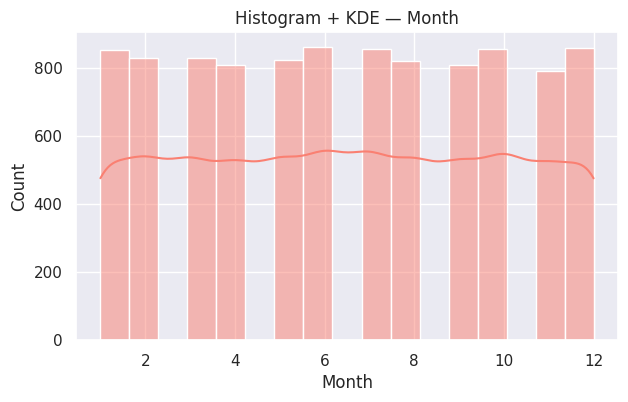

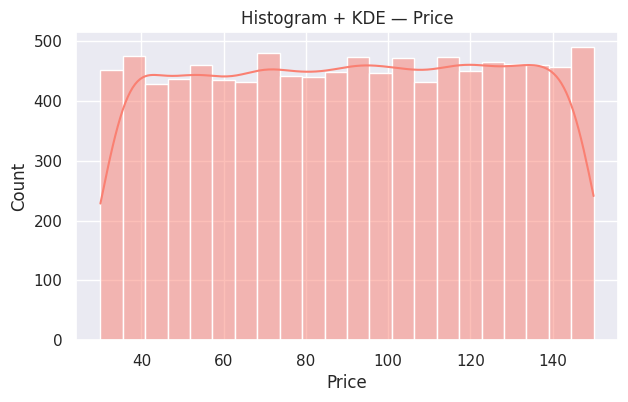

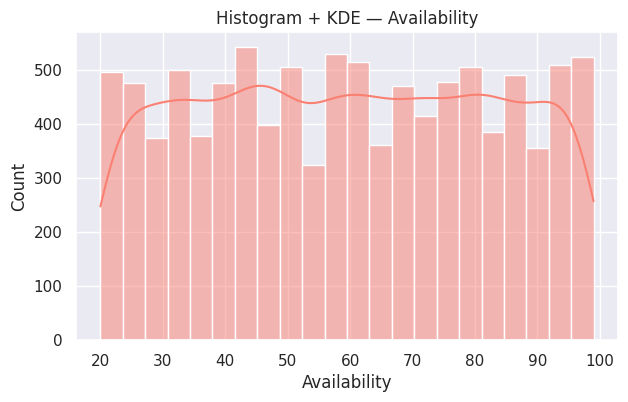

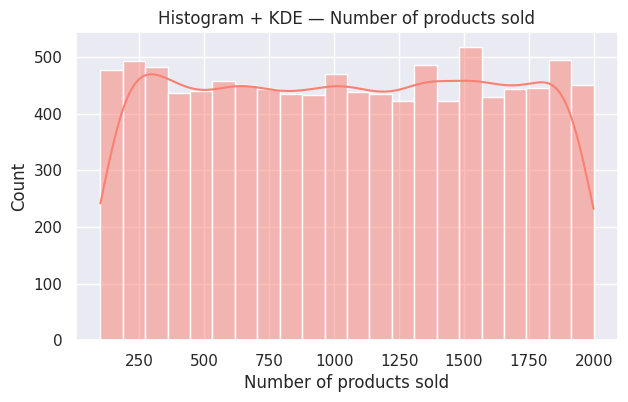

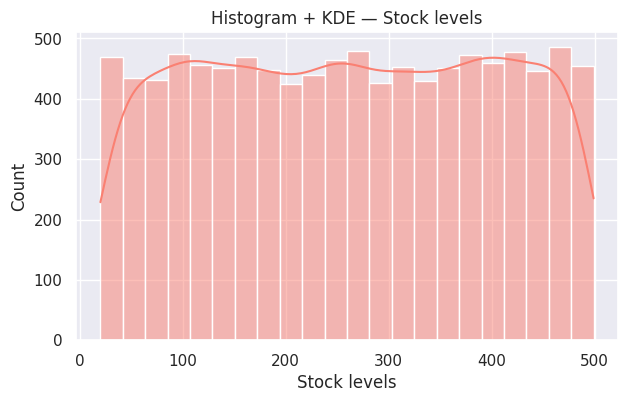

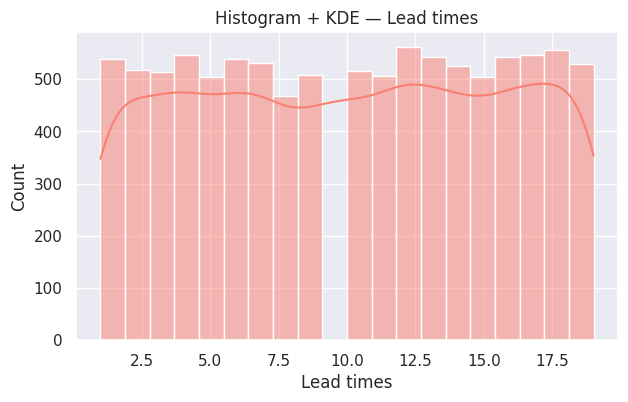

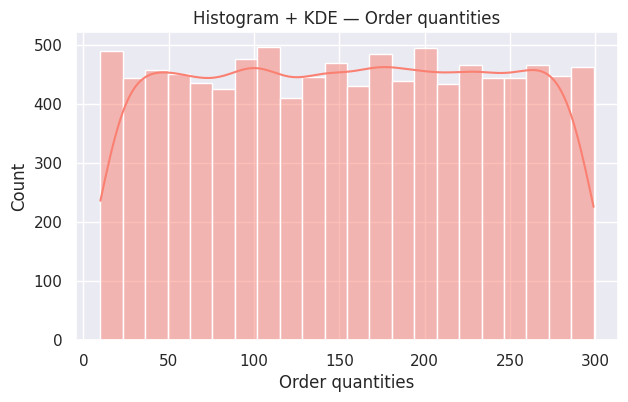

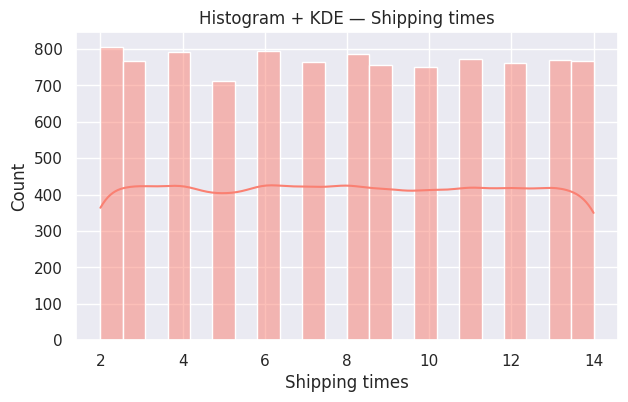

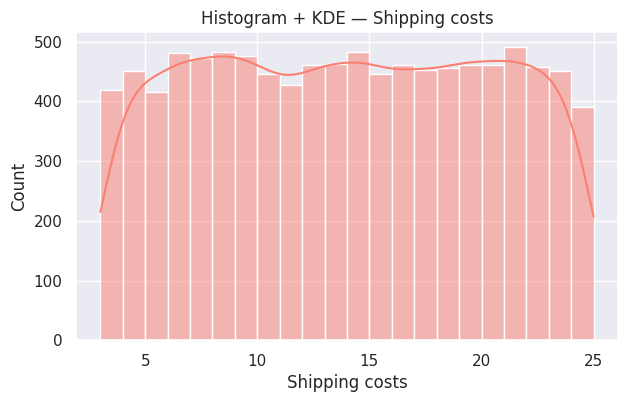

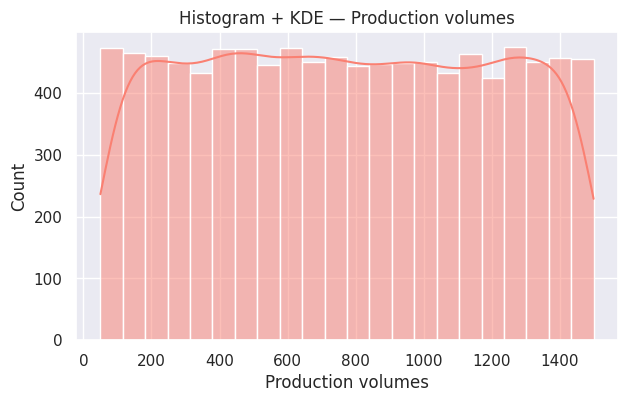

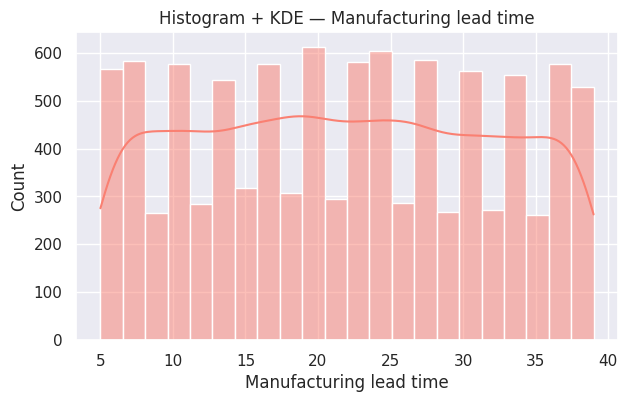

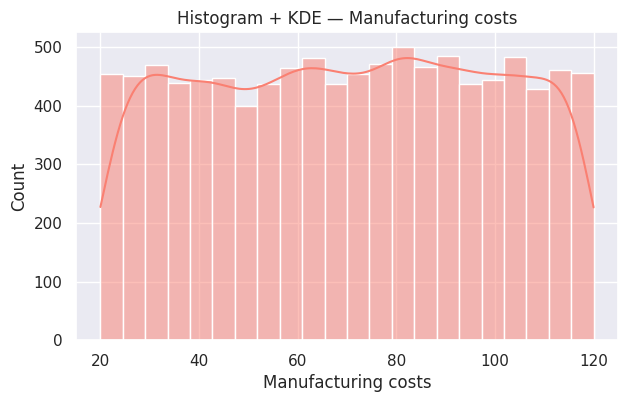

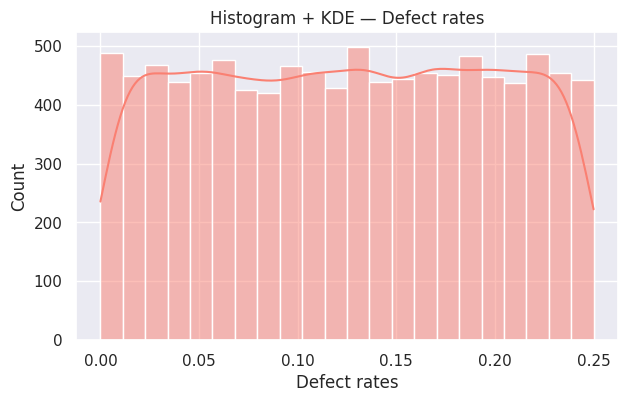

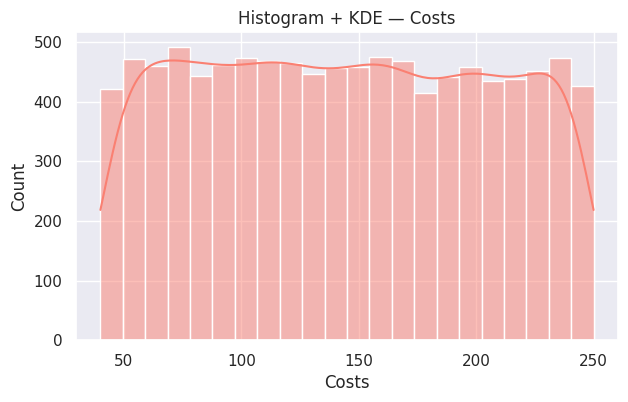

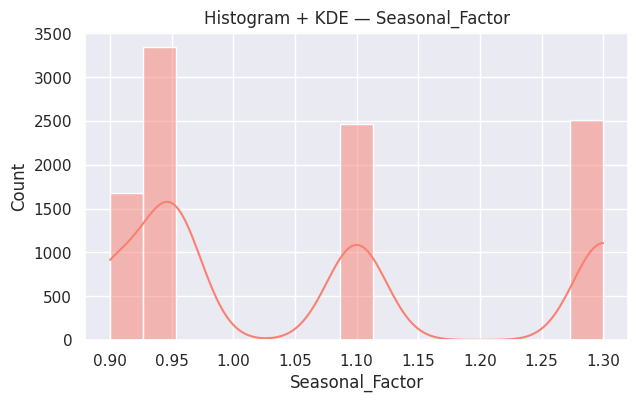

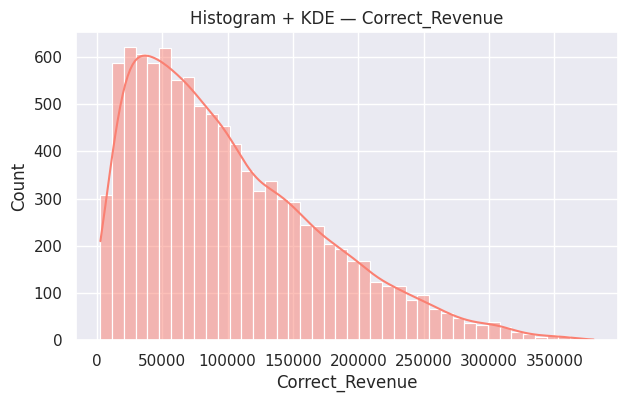

In [100]:
# 📌 3. COLORFUL HISTOGRAMS + KDE
# ==========================================================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color="salmon")
    plt.title(f"Histogram + KDE — {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Histogram of MONTH
✔ What it means:

The bars are almost equal
→ Sales are happening in all months evenly.

No specific month has more or fewer sales.

✔ Simple Example:

Imagine you sell 100 products every month.
January = 100, February = 100, March = 100…
→ All months same.

Histogram of PRICE
✔ What it means:

Price is spread from 30 to 150.
All price values appear in equal amount.

No very cheap, no very expensive cluster.

✔ Simple Example:

Your shop sells items between ₹30 to ₹150.
People buy all price ranges equally.

3️⃣ Histogram of AVAILABILITY
✔ What it means:

Availability (20–100 range) is evenly spread.
Every availability number appears almost same.

✔ Simple Example:

Some days you have 20 items, some days 50, some days 100.
All are common, not one number dominating.

4️⃣ Histogram of NUMBER OF PRODUCTS SOLD
✔ What it means:

Products sold vary from 100 to 2000 units.
Sales happen at all levels.

✔ Simple Example:

Sometimes you sell 150 units, sometimes 500, sometimes 900.
No fixed pattern

5️⃣ Histogram of STOCK LEVELS
✔ What it means:

Stock levels (0–500 range) are evenly spread.
Inventory varies lot, all ranges exist.

✔ Simple Example:

Your store sometimes has 100 items, sometimes 500 — all normal.

6️⃣ Histogram of LEAD TIMES
✔ What it means:

Delivery days range from 2 to 20 days.
All delivery times appear equally.

✔ Simple Example:

Some orders arrive in 5 days, some in 10, some in 15.
No particular pattern.

7️⃣ Histogram of ORDER QUANTITIES
✔ What it means:

Order quantities vary from 20 to 300.
All quantities appear commonly.

✔ Simple Example:

Customers sometimes order 20 units, 40 units, 200 units.
All are common.

8️⃣ Histogram of SHIPPING TIMES
✔ What it means:

Shipping times range between 2 to 14 days.
All values appear equally.

✔ Simple Example:

Products sometimes reach in 3 days, sometimes 10.
No fixed speed.

9️⃣ Histogram of SHIPPING COSTS
✔ What it means:

Costs between 5 and 25.
No extreme costs.

✔ Simple Example:

Shipping can cost ₹10 or ₹20.
Everything is normal, no high charges.

🔟 Histogram of PRODUCTION VOLUMES
✔ What it means:

Production volume ranges from 0 to 1500 units.
Even distribution.

✔ Example:

Factory sometimes produces 300 units, sometimes 900.
All production levels are common.

1️⃣1️⃣ Histogram of MANUFACTURING LEAD TIME
✔ What it means:

Manufacturing takes between 5 and 40 days.
Evenly spread.

✔ Example:

Some products take 10 days to make, some 25.
Normal variation.

1️⃣2️⃣ Histogram of MANUFACTURING COSTS
✔ What it means:

Cost ranges from 20 to 120.
No extreme jumps.

✔ Example:

Making an item may cost ₹30 or ₹100 — both common.

1️⃣3️⃣ Histogram of DEFECT RATES
✔ What it means:

Defects between 0% to 25%.
Soft peak around 10%.

✔ Example:

Sometimes 5% products defective, sometimes 20%.
Normal for manufacturing.

1️⃣4️⃣ Histogram of COSTS
✔ What it means:

Total cost ranges 50–250.
Smooth distribution.

✔ Example:

Some shipments cost ₹60, some ₹200.
No major spike.

1️⃣5️⃣ Histogram of SEASONAL FACTOR
✔ What it means:

Seasonal factor has 3 big spikes:

0.95

1.10

1.30

Meaning:
Different seasons have different demand.

✔ Example:

Festival season factor = 1.30 → high demand
Rainy season factor = 0.95 → low demand

1️⃣6️⃣ Histogram of CORRECT REVENUE
✔ What it means:

Revenue is right-skewed.
Most revenue values are low.
Few orders generate very high revenue.

✔ Example:

Most orders earn ₹20,000–₹60,000.
Some earn ₹2,00,000 or ₹3,50,000 (big orders).

FINAL SUMMARY (Very Simple)

Many numeric values are evenly spread → data is synthetic.

Revenue has very high outliers → big sales sometimes happen.

Seasonal factor has 3 clear groups → low, medium, high season.

No missing months, no missing price ranges → good clean dataset.

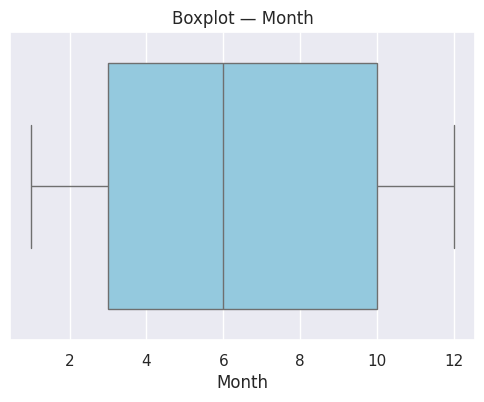

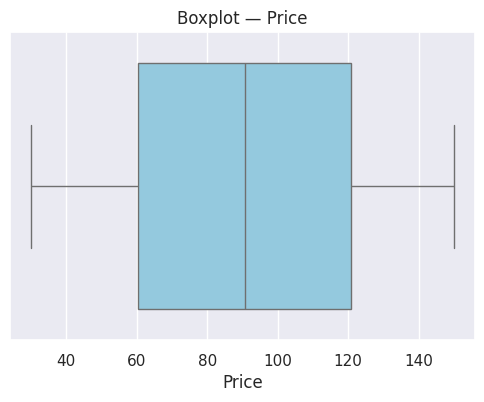

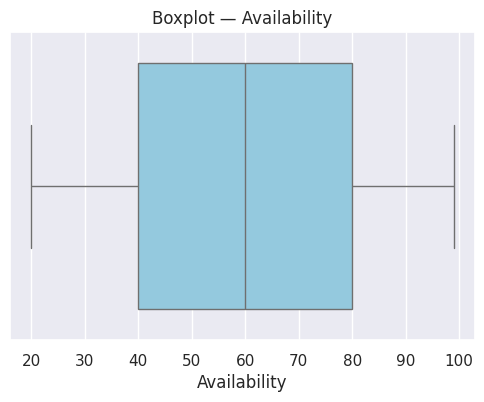

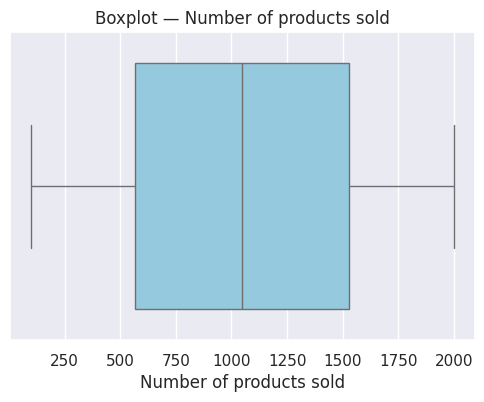

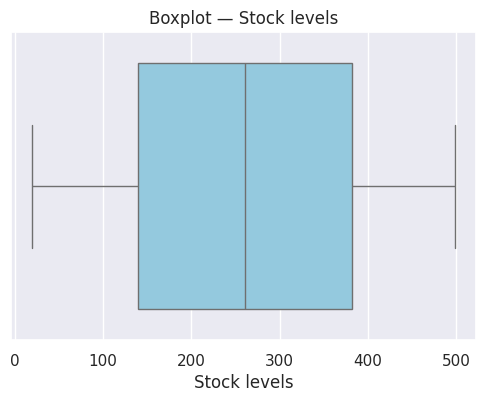

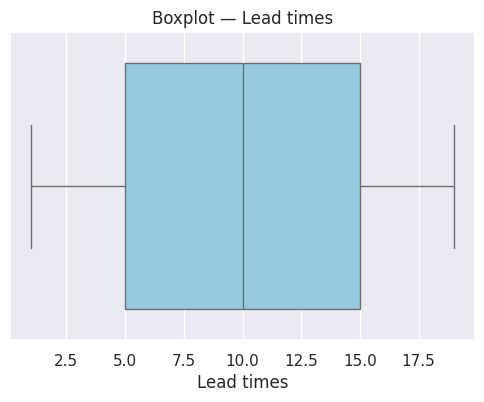

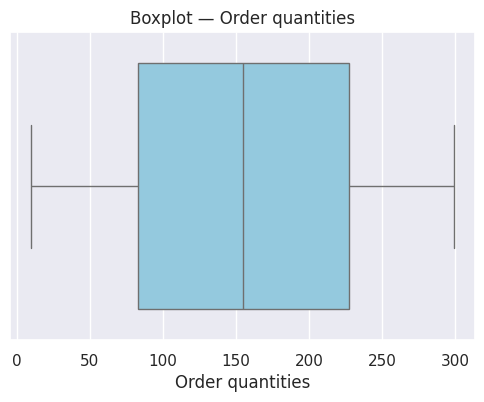

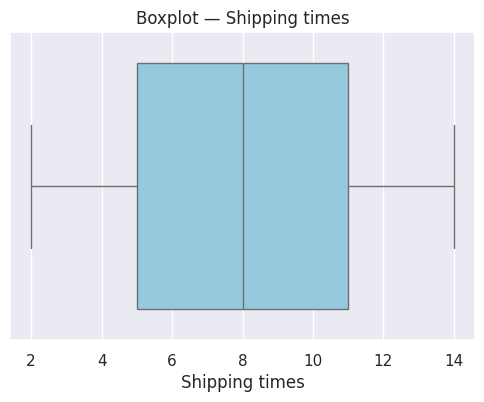

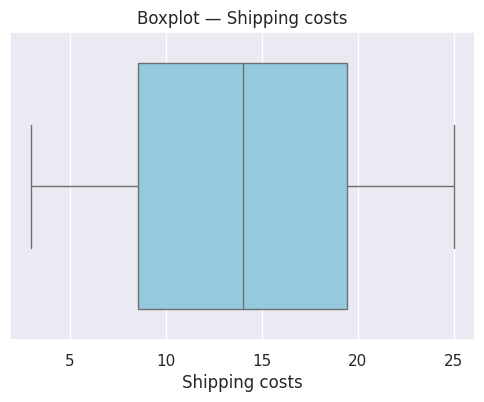

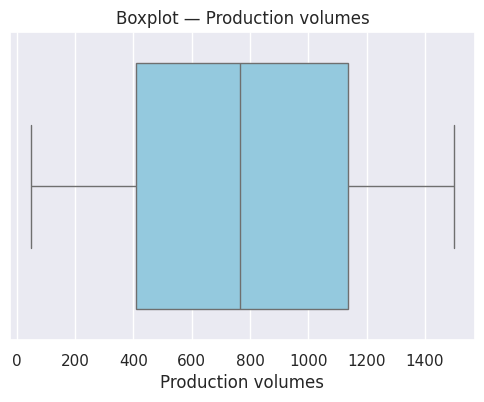

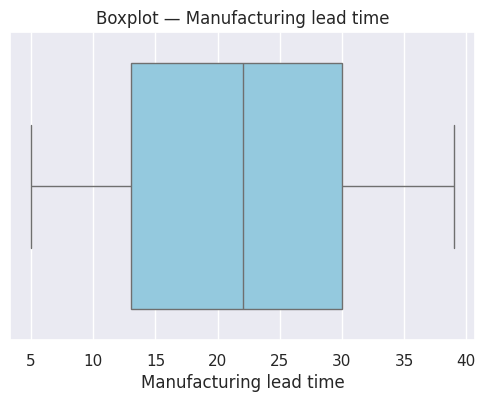

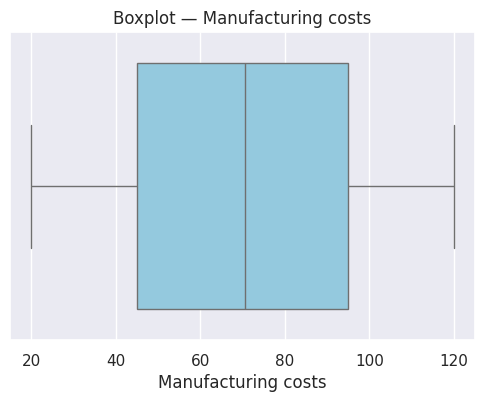

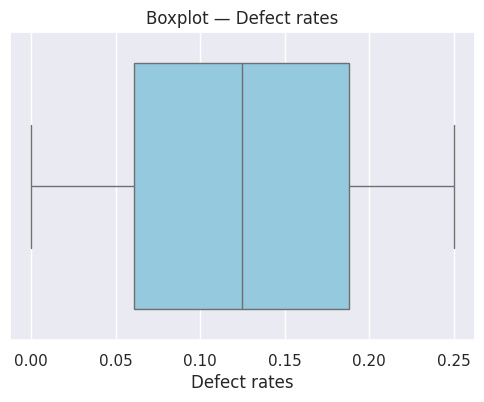

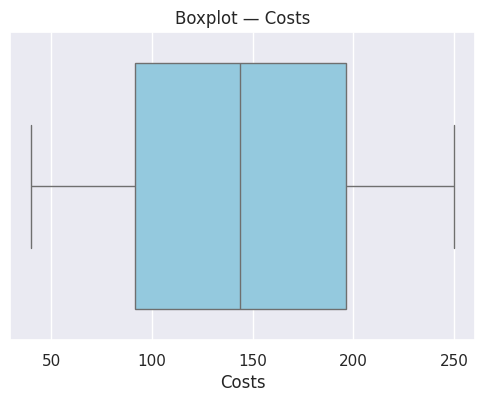

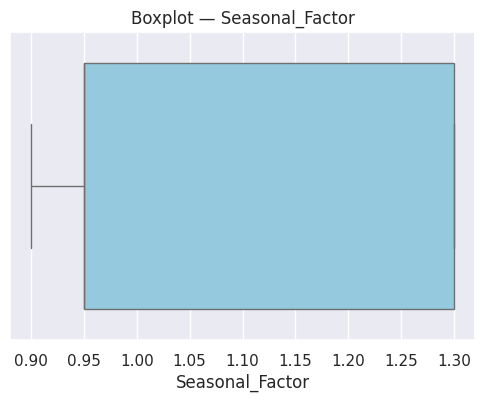

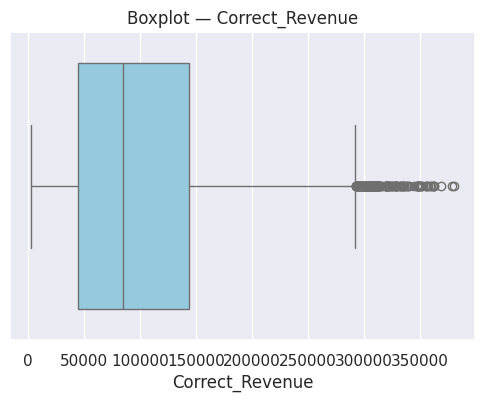

In [101]:
# 📌 4. COLORFUL BOXPLOTS (OUTLIERS)
# ==========================================================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot — {col}")
    plt.show()


/tmp/ipython-input-2249108681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


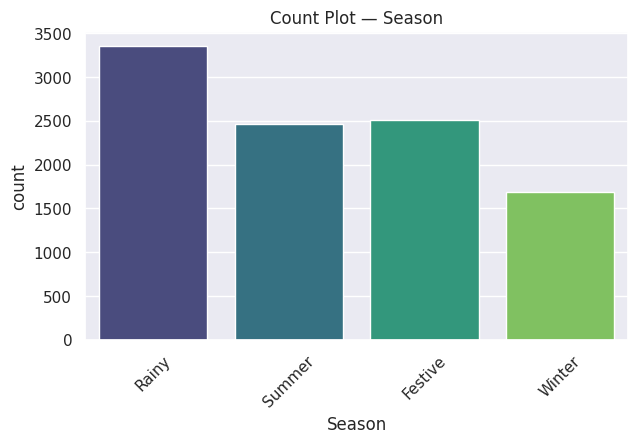

/tmp/ipython-input-2249108681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


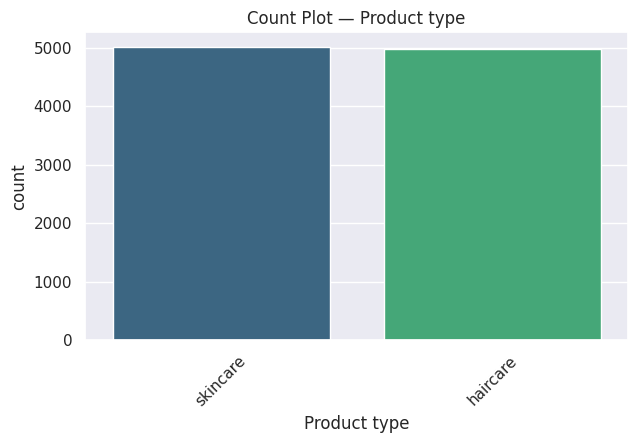

/tmp/ipython-input-2249108681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


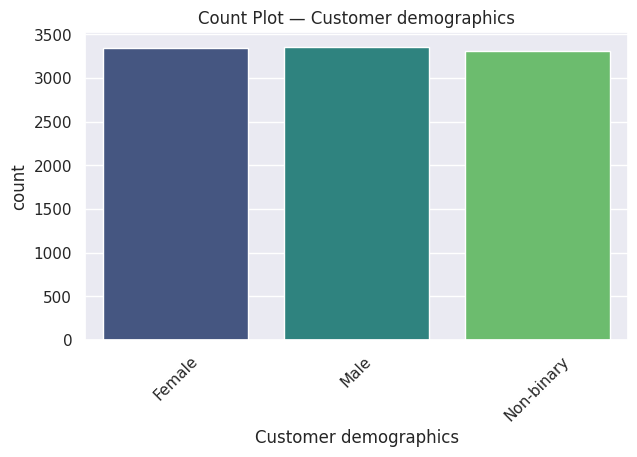

/tmp/ipython-input-2249108681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


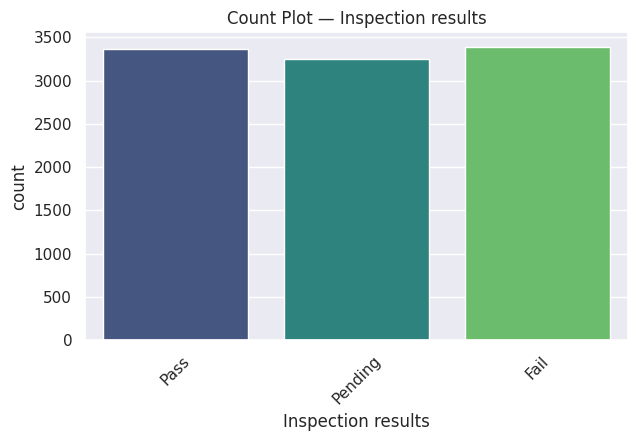

/tmp/ipython-input-2249108681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


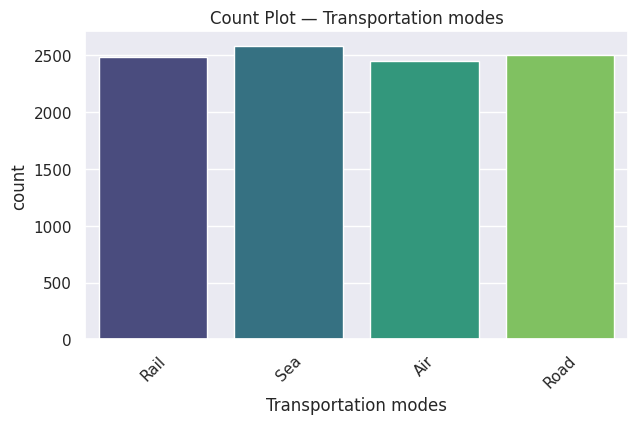

/tmp/ipython-input-2249108681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


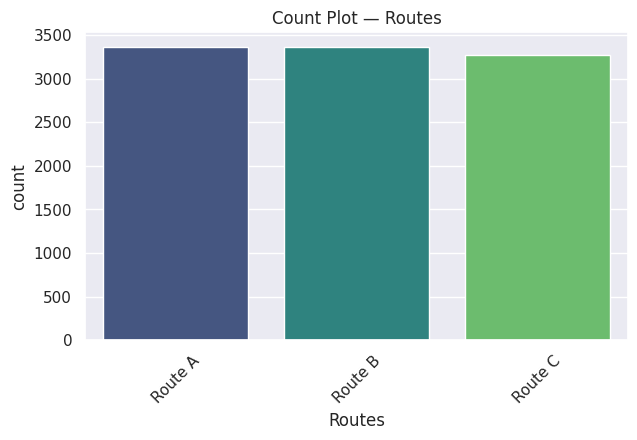

/tmp/ipython-input-2249108681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


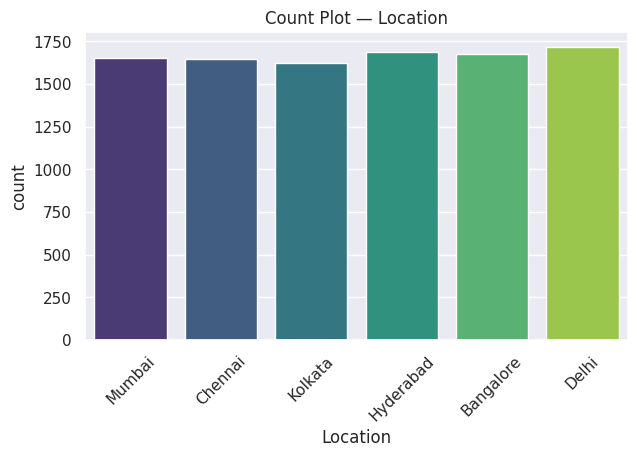

In [102]:
# ==========================================================
# 📌 5. COLORFUL COUNT PLOTS (CATEGORICAL)
# ==========================================================
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Count Plot — {col}")
    plt.xticks(rotation=45)
    plt.show()


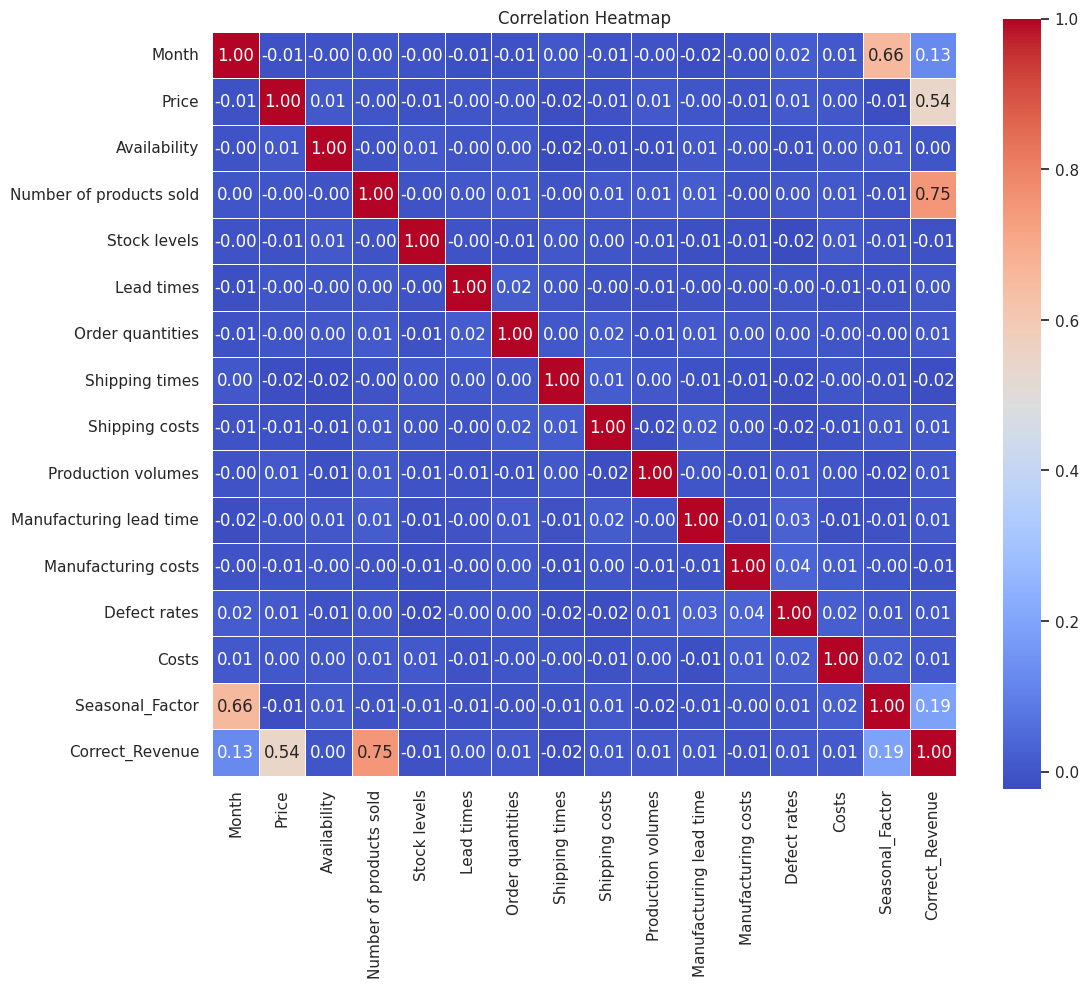

In [103]:
# ==========================================================
# 📌 6. COLORFUL CORRELATION HEATMAP
# ==========================================================
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True, square=True,fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


| Feature Relationship               | Heatmap Color   | Meaning (Simple English)                                     | Meaning (Malayalam Style)                                                  |
| ---------------------------------- | --------------- | ------------------------------------------------------------ | -------------------------------------------------------------------------- |
| **Products Sold → Revenue**        | 🟧 Light Orange | Strongest positive relation. More units sold = more revenue. | **Kooduthal product kalayumbol → revenue koodum.** Ithanu main sambandham. |
| **Price → Revenue**                | 🟧 Light Orange | Small positive relation. High price = little more revenue.   | **Price koottiyal revenue alpa koottum.** Strong alla.                     |
| **Seasonal Factor → Revenue**      | 🟧 Light Orange | Medium relation. Season impacts sales.                       | **Season prabhavam undu.** Festival-il koodum, rainy-il kurayum.           |
| **Stock Levels → Revenue**         | 🔵 Blue         | Very weak relation. Stock doesn’t guarantee sales.           | **Stock undenkilum sale varum ennalla.** Demand pradhanam.                 |
| **Shipping Time → Revenue**        | 🔵 Blue         | No relation. Shipping days do not affect revenue.            | **Shipping delay revenue-ne affect cheyyilla.**                            |
| **Manufacturing Time → Revenue**   | 🔵 Blue         | No relation.                                                 | **Manufacturing time influence illa.**                                     |
| **Costs → Revenue**                | 🔵 Blue         | Weak relation.                                               | **Cost koodiyal revenue vary cheyyilla.**                                  |
| **Defect Rates → Revenue**         | 🔵 Blue         | Almost no relation.                                          | **Defect rate valare kurachu effect.**                                     |
| **Order Quantity → Products Sold** | 🔵 Light Blue   | Weak relation.                                               | **Order quantity koottiyal sales guaranteed alla.**                        |
| **Shipping Costs → Revenue**       | 🔵 Blue         | Weak/no relation.                                            | **Shipping cost revenue-ne affect cheyyilla.**                             |
| **Production Volume → Revenue**    | 🔵 Blue         | No relation.                                                 | **Production koodiyal revenue koodum ennilla.**                            |


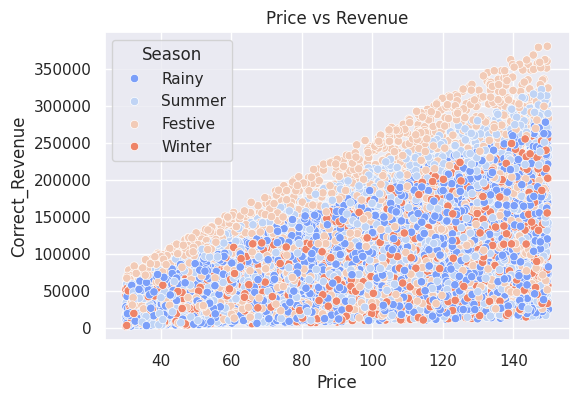

In [104]:
# Price vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Price"], y=df["Correct_Revenue"], hue=df["Season"], palette="coolwarm")
plt.title("Price vs Revenue")
plt.show()


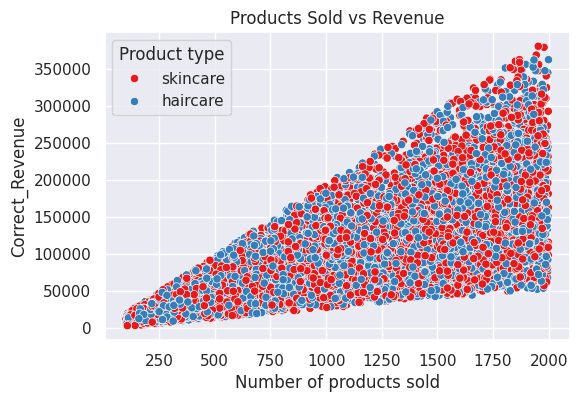

In [105]:
# Products sold vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Number of products sold"], y=df["Correct_Revenue"],
                hue=df["Product type"], palette="Set1")
plt.title("Products Sold vs Revenue")
plt.show()

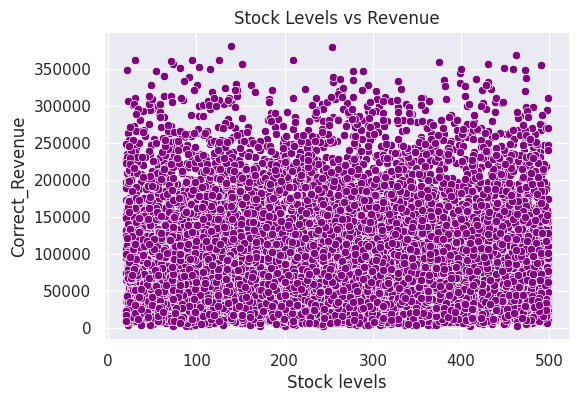

In [106]:
# Stock vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Stock levels"], y=df["Correct_Revenue"], color="purple")
plt.title("Stock Levels vs Revenue")
plt.show()


| Scatter Plot                | Meaning (Simple English)                                                 | Meaning (Malayalam Mix)                                                            | Insight                 |
| --------------------------- | ------------------------------------------------------------------------ | ---------------------------------------------------------------------------------- | ----------------------- |
| **Price → Revenue**         | As price increases, revenue also increases slowly.                       | **Price koottiyal revenue kurachu koottunnu.** Strong alla, but relation undu.     | Small Positive Relation |
| **Products Sold → Revenue** | More products sold = very high increase in revenue. Strong upward trend. | **Kooduthal product vilkumbol → revenue valiya pole koottum.** Ith aanu strongest. | ⭐ Strongest Relation    |
| **Stock Levels → Revenue**  | No clear pattern. Even if stock is high, revenue stays random.           | **Stock koodiyalum revenue guarantee illa.** Demand pradhanam.                     | No Relation             |


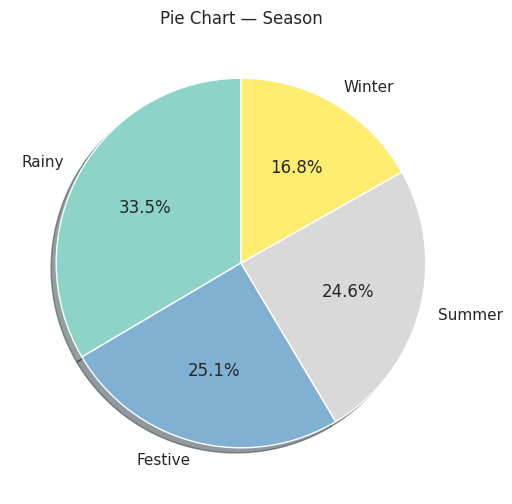

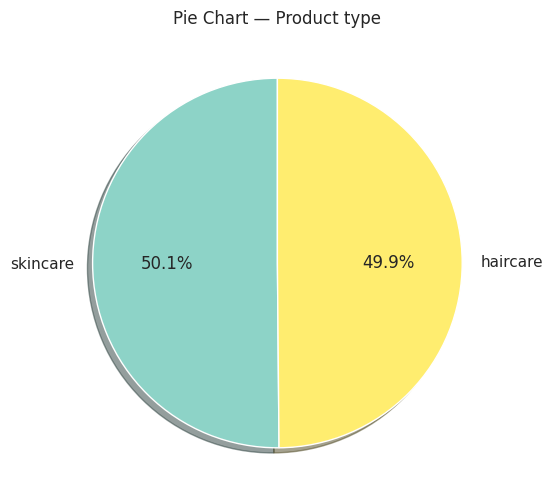

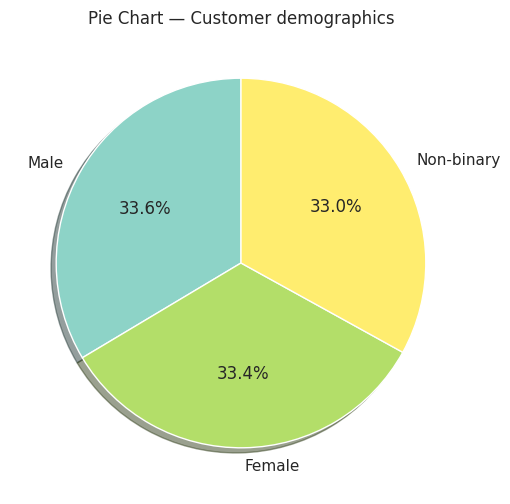

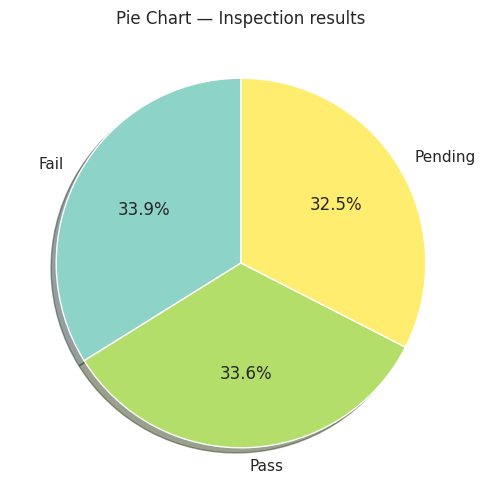

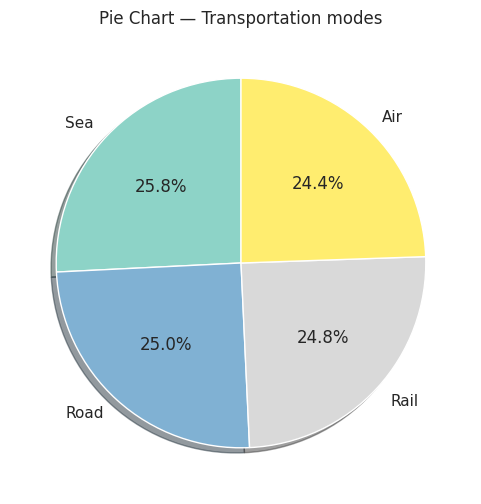

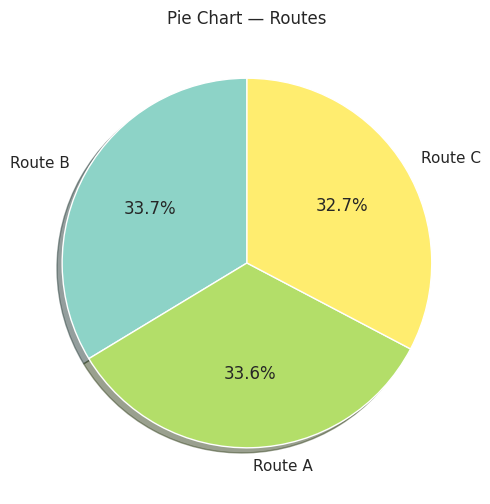

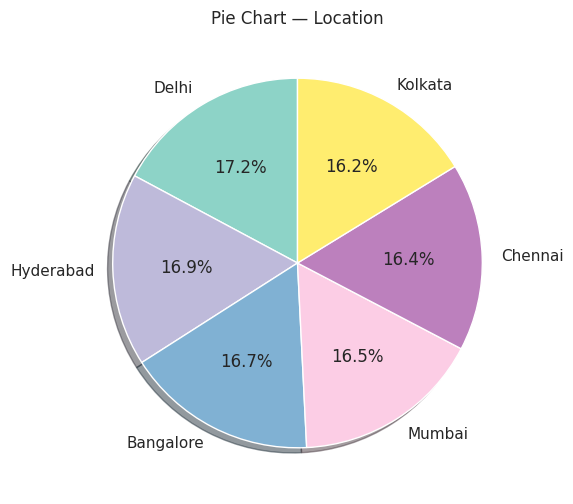

In [107]:

# ==========================================================
for col in cat_cols:
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot.pie(
        autopct="%1.1f%%",
        startangle=90,
        shadow=True,
        cmap="Set3"
    )
    plt.title(f"Pie Chart — {col}")
    plt.ylabel("")  # remove y-label for clean look
    plt.show()

In [108]:
# Check if column exists if not create new one but here its exits
if "Correct_Revenue" not in df.columns:
    df["Correct_Revenue"] = df["Price"] * df["Number of products sold"]
print("Target stats:")
print(df["Correct_Revenue"].describe().to_string())


Target stats:
count     10000.000000
mean     100864.107212
std       71092.436714
min        2784.710000
25%       44602.117500
50%       85068.510000
75%      143574.442500
max      379997.160000


In [109]:
# STEP 1 — Split features and target


X = df.drop("Correct_Revenue", axis=1)
y = df["Correct_Revenue"].copy()
#STEP 2 — Get categorical columns
cat_cols = X.select_dtypes(include="object").columns.tolist()
#STEP 3 — Detect rare categories
for c in cat_cols:
    freq = X[c].value_counts()
    rare = freq[freq < 20].index
    if len(rare):
        X[c] = X[c].replace(rare, "Other")
print("Categorical columns reduced:", cat_cols)
#STEP 4 — Replace rare categories with “Other”

Categorical columns reduced: ['Season', 'Product type', 'Customer demographics', 'Inspection results', 'Transportation modes', 'Routes', 'Location']


In [110]:
# Convert categorical columns into numbers
X = pd.get_dummies(X, drop_first=True)
print("After get_dummies shape:", X.shape)


After get_dummies shape: (10000, 33)


In [111]:
# removes OUTLIERS from numeric columns

#Using a method called Winsorization.


num_cols_X = X.select_dtypes(include=[np.number]).columns
for col in num_cols_X:
    low = X[col].quantile(0.01)
    high = X[col].quantile(0.99)
    X[col] = X[col].clip(lower=low, upper=high)
print("Winsorized numeric features 1%-99%.")


Winsorized numeric features 1%-99%.


In [112]:
# 👉 This cell fixes skewness in numeric columns
#👉 by applying log transformation to columns that are highly skewed.
skew = X[num_cols_X].skew().abs()
rf_skew_cols = skew[skew > 1].index.tolist()   # save for later
applied = []
for c in rf_skew_cols:
    if (X[c] >= 0).all() and X[c].nunique() > 10:
        X[c] = np.log1p(X[c])
        applied.append(c)
rf_skew_cols = applied  # use only actually applied
print("Applied log1p to:", rf_skew_cols)


Applied log1p to: []


| Skewness Value | Meaning (English)          | Malayalam Meaning               |
| -------------- | -------------------------- | ------------------------------- |
| **0**          | Perfectly symmetric        | Perfect equal distribution      |
| **0 to 0.5**   | Slight skew                | Kurachu tilt                    |
| **0.5 to 1**   | Moderate skew              | Middle tilt                     |
| **> 1**        | **High skew (bad for ML)** | Valare uneven, ML confuse aakum |
| **< -1**       | High negative skew         | Opposite direction-il tilt      |


In [113]:
# train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (8000, 33) Test shape: (2000, 33)


In [114]:
#1. Create the model
lr = LinearRegression()
#2. Train the model
lr.fit(X_train, y_train)
#3. Make predictions
y_pred_lr = lr.predict(X_test)


In [115]:
from sklearn.metrics import mean_absolute_error

rmse_lr = (mean_squared_error(y_test, y_pred_lr))**0.5
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
r2_lr   = r2_score(y_test, y_pred_lr)

print("LINEAR REGRESSION RESULTS")
print("R2:", r2_lr)
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)

LINEAR REGRESSION RESULTS
R2: 0.8955239364332002
RMSE: 23087.420886170665
MAE: 17005.66796298664


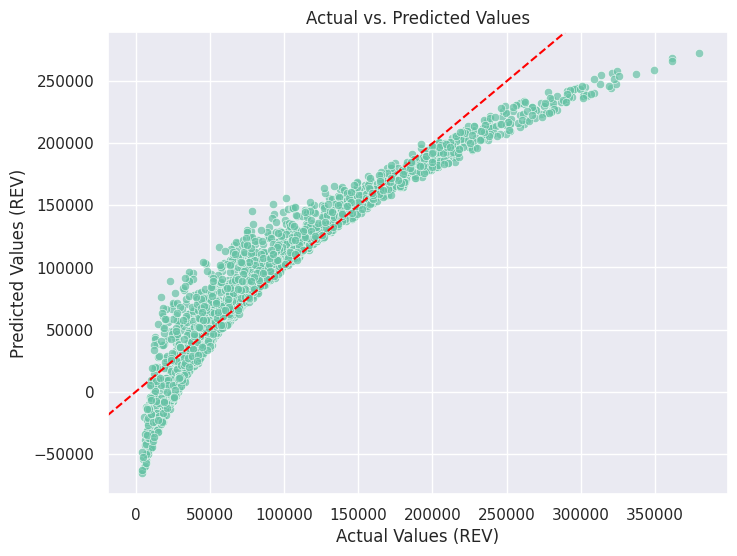

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
plt.xlabel("Actual Values (REV)")
plt.ylabel("Predicted Values (REV)")
plt.title("Actual vs. Predicted Values")
plt.axline([0,0],[1,1],color="red",linestyle="--")
plt.show()

In [117]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV


In [118]:
#Alpha controls how strongly Ridge shrinks big weights. We are testing many alpha values to find the best one.

ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 50, 100, 200]
}

ridge = Ridge()

ridge_grid = GridSearchCV(
    ridge,
    ridge_params,
    cv=5, # data 5 pieces ayi divide cheythu test cheyyum  (5-fold cross validation)
    scoring='r2', #use R² score to choose best
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", (mean_squared_error(y_test, y_pred_ridge))**0.5)
print("Ridge MAE:",mean_absolute_error(y_test, y_pred_ridge))



Best Ridge Alpha: {'alpha': 1}
Ridge R2: 0.8955278681097525
Ridge RMSE: 23086.9864654897
Ridge MAE: 17005.74652923685


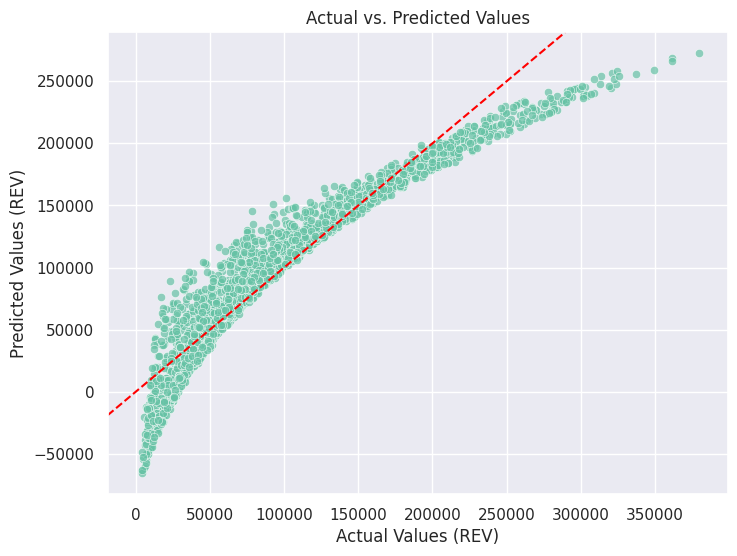

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y= y_pred_ridge, alpha=0.7)
plt.xlabel("Actual Values (REV)")
plt.ylabel("Predicted Values (REV)")
plt.title("Actual vs. Predicted Values")
plt.axline([0,0],[1,1],color="red",linestyle="--")
plt.show()

In [120]:
lasso_params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

lasso = Lasso(max_iter=5000)

lasso_grid = GridSearchCV(
    lasso,
    lasso_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train)

best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", (mean_squared_error(y_test, y_pred_lasso))**0.5)
print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))


Best Lasso Alpha: {'alpha': 10}
Lasso R2: 0.8956080521402884
Lasso RMSE: 23078.12494932042
Lasso MAE: 16997.607278005213


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.760e+09, tolerance: 4.033e+09
  model = cd_fast.enet_coordinate_descent(


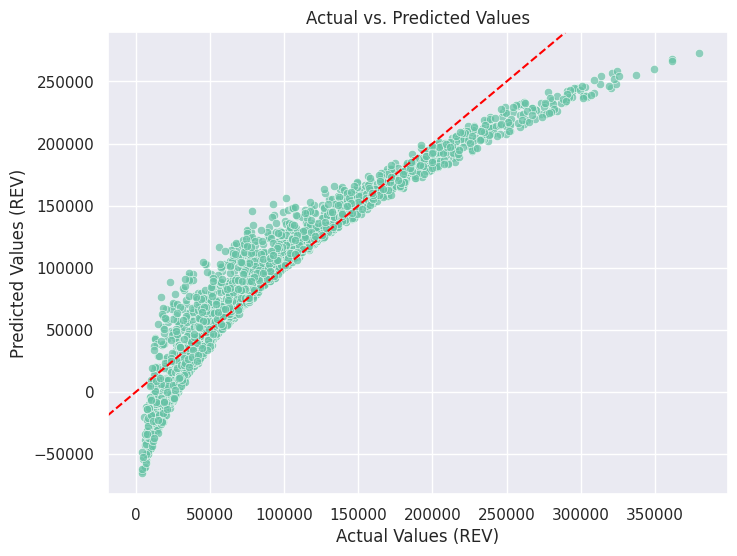

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.7)
plt.xlabel("Actual Values (REV)")
plt.ylabel("Predicted Values (REV)")
plt.title("Actual vs. Predicted Values")
plt.axline([0,0],[1,1],color="red",linestyle="--")
plt.show()

In [122]:
rf = RandomForestRegressor(
    n_estimators=100, # number of trees
    max_depth=10, #Each tree can grow only 10 levels deep.
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [123]:
rmse_rf = (mean_squared_error(y_test, y_pred_rf))**0.5
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print("RANDOM FOREST RESULTS")
print("R2:", r2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)


RANDOM FOREST RESULTS
R2: 0.9981528441858193
RMSE: 3069.861522179069
MAE: 2210.0730813421583


| Metric          | Value     | Meaning                         |
| --------------- | --------- | ------------------------------- |
| **R² = 0.998**  | Very high | Model prediction almost perfect |
| **RMSE = 3069** | Normal    | ₹3000 average error             |
| **MAE = 2210**  | Normal    | ₹2200 simple error              |


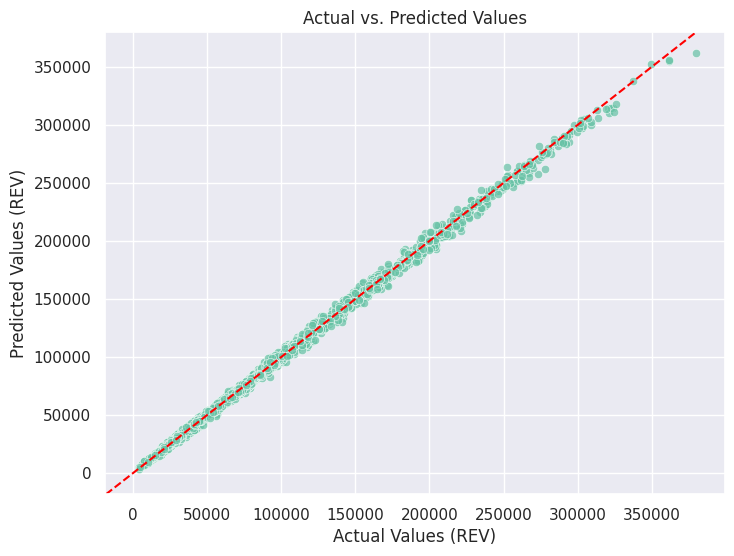

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel("Actual Values (REV)")
plt.ylabel("Predicted Values (REV)")
plt.title("Actual vs. Predicted Values")
plt.axline([0,0],[1,1],color="red",linestyle="--")
plt.show()

In [125]:
# CELL 11
rf_columns = X_train.columns.tolist()             # exact columns and order RF was trained on
rf_num_cols = num_cols_X.tolist()                 # numeric columns (for clipping)
# rf_skew_cols already defined in CELL 8
print("Saved rf_columns length:", len(rf_columns))
print("Saved rf_num_cols length:", len(rf_num_cols))
print("Saved rf_skew_cols:", rf_skew_cols)


Saved rf_columns length: 33
Saved rf_num_cols length: 15
Saved rf_skew_cols: []


In [126]:
# CELL 12
def manual_predict_rf_from_rawrow(raw_row_series):
    """
    raw_row_series: a pd.Series representing one original raw row (from df_raw.iloc[i])
    Returns predicted revenue (float) using same preprocessing used for training.
    """
    # 1) Build single-row DataFrame from raw row (keep original column names)
    df_manual = pd.DataFrame([raw_row_series.to_dict()])

    # 2) Apply same rare-category replacement on categorical columns
    for c in cat_cols:
        if c in df_manual.columns:
            # categories considered 'rare' during training were replaced with "Other" in X
            # We apply the same rule: if category not present in training's unique set, map to "Other"
            train_uniques = df[c].unique()  # using original df (before dummy)
            if df_manual.at[0, c] not in train_uniques:
                df_manual.at[0, c] = "Other"

    # 3) One-hot encode the single row (same scheme as training)
    df_manual = pd.get_dummies(df_manual, drop_first=True)

    # 4) Add missing columns that the model expects, set to 0
    for col in rf_columns:
        if col not in df_manual.columns:
            df_manual[col] = 0

    # 5) Ensure column order matches rf_columns
    df_manual = df_manual[rf_columns]

    # 6) Winsorize numeric columns same as training (use training quantiles from X)
    for col in rf_num_cols:
        if col in df_manual.columns:
            low = X[col].quantile(0.01)
            high = X[col].quantile(0.99)
            df_manual[col] = df_manual[col].clip(lower=low, upper=high)

    # 7) Apply log1p to same skewed cols
    for col in rf_skew_cols:
        if col in df_manual.columns:
            # guard: negative values should not occur due to clipping, but check
            if (df_manual[col] >= 0).all():
                df_manual[col] = np.log1p(df_manual[col])

    # 8) Final predict
    pred = rf.predict(df_manual)[0]
    return pred


In [127]:
# CELL 13
row_index = 0  # row 3 is iloc[2]
raw_row = df.iloc[row_index]
print("Original row (raw) — first 12 columns:")
display(raw_row.head(12))

pred_row3 = manual_predict_rf_from_rawrow(raw_row)
print("\nPredicted revenue for row index", row_index, ":", pred_row3)

# show true revenue from raw data for comparison
print("True Correct_Revenue (raw):", raw_row.get("Correct_Revenue", None))


Original row (raw) — first 12 columns:


,0
Month,7
Season,Rainy
Product type,skincare
Price,103.65
Availability,45
Number of products sold,641
Customer demographics,Female
Stock levels,357
Lead times,16
Order quantities,38



Predicted revenue for row index 0 : 64367.147003527134
True Correct_Revenue (raw): 63117.67


| Reason                       | Explanation                            |
| ---------------------------- | -------------------------------------- |
| ML prediction is approximate | Not exact                              |
| Real data has noise          | ML cannot capture everything           |
| Some randomness              | Discount, seasonal effect, etc.        |
| Normal error                 | RMSE & MAE already show expected error |


In [128]:
# CELL 14
# Example: modify the fields below for a custom manual prediction
custom = df.iloc[2].to_dict()   # start from row 3 defaults and change if you want
# Example override (uncomment and change values as needed):
# custom["Price"] = 90.0
# custom["Number of products sold"] = 1800
# custom["Location"] = "Mumbai"

pred_custom = manual_predict_rf_from_rawrow(pd.Series(custom))
print("Predicted revenue for custom input:", pred_custom)


Predicted revenue for custom input: 220649.16091217787


In [129]:
import os
os.makedirs("model", exist_ok=True)


In [130]:
import joblib

# Create folder
import os
os.makedirs("model", exist_ok=True)

# Save Random Forest model
joblib.dump(rf, "model/rf_model.joblib")

# Save column order
joblib.dump(rf_columns, "model/rf_columns.joblib")

# Save skew columns
joblib.dump(rf_skew_cols, "model/rf_skew_cols.joblib")

# Save numeric columns
joblib.dump(rf_num_cols, "model/rf_num_cols.joblib")

print("All files saved successfully!")


All files saved successfully!


In [131]:
import joblib
joblib.dump(rf, "rf_model.joblib",compress=3)
joblib.dump(rf_columns, "rf_columns.joblib")
joblib.dump(rf_skew_cols, "rf_skew_cols.joblib")
joblib.dump(rf_num_cols, "rf_num_cols.joblib")

['rf_num_cols.joblib']

In [132]:
print(df.columns)


Index(['Month', 'Season', 'Product type', 'Price', 'Availability',
       'Number of products sold', 'Customer demographics', 'Stock levels',
       'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs', 'Location', 'Seasonal_Factor', 'Correct_Revenue'],
      dtype='object')
